In [1]:
# notebook.py

# Document Reading Chat Bot - Notebook
- Transform any document into a chat bot and ask it questions.


## Table of Contents
- [Data Gathering And Transforming](#Data-Gathering-And-Transforming)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Observation](Observation)


In [2]:
# __Environment__
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from library import *

cd_data = 'data/'
cd_figures = 'figures/'


## Data Gathering And Transforming


## Data Gathering And Transforming

In [3]:
# __Wrangle Data__
# load_wiki_article(cd_data=cd_data)
doc = read_wiki_article(cd_data=cd_data)
chess = ProcessedArticle(doc)

# __Transform__
token_df = pd.DataFrame({'token':chess.remove_stopwords})
token_counts_df = pd.DataFrame(token_df['token'].value_counts())
token_1h_df = chess.one_hot

# __Write To File__
token_df.to_csv(cd_data+'tokens.csv', index=False)
token_counts_df.to_csv(cd_data+'tokens_counts.csv')
token_1h_df.to_csv(cd_data+'tokens_1h.csv', index=False)


### Exploratory Data Analysis


,token
rule,89
player,88
piece,70
game,68
king,60
time,55
square,55
chess,43
pawn,34
Chess,33


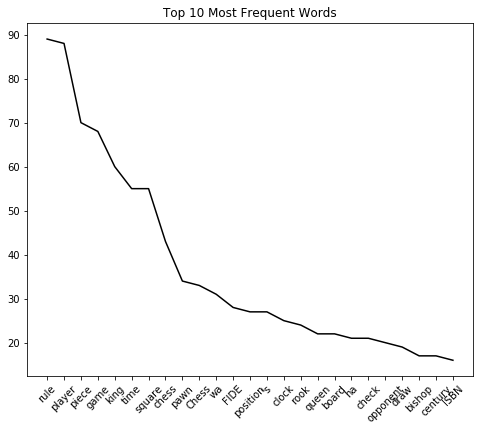

In [4]:
# __Plotting The Top 10 Most Frequent Words__
data = token_counts_df.groupby('token')
plot_title = 'top-10-most-frequent-words'
plt.figure(figsize=(8,6.5))
plt.title(plot_title.replace('-', ' ').title())
plt.plot(token_counts_df['token'][:25], color='black', label='STANDARD')
plt.savefig(cd_figures+plot_title+'.png', transparent=True)
plt.xticks(rotation=45)
token_counts_df.head(25)


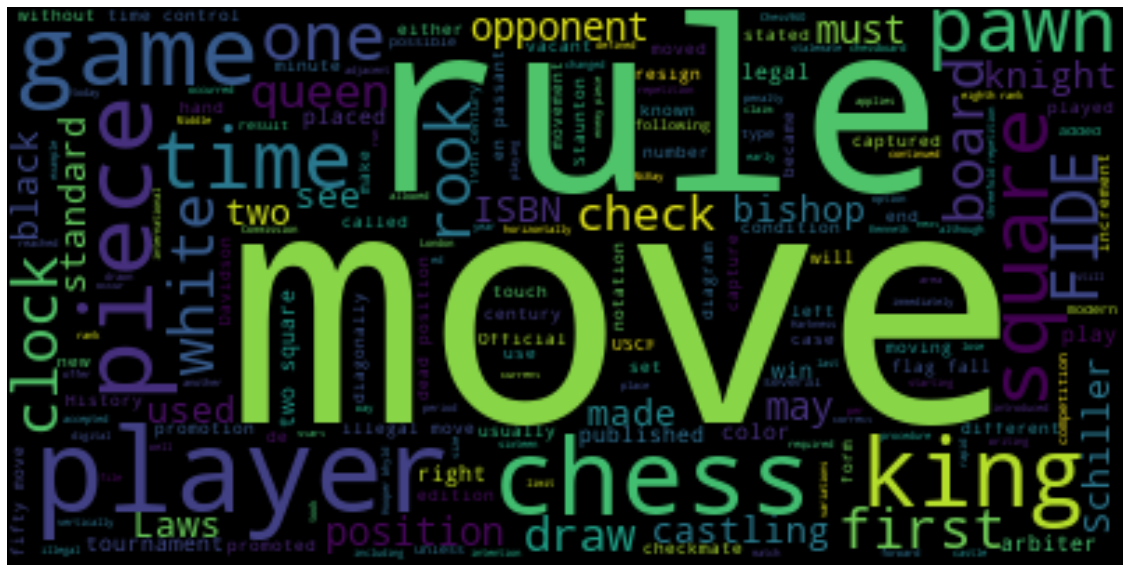

In [5]:
# __Generating Word Cloud__
wordcloud = WordCloud().generate(doc)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(cd_figures+'wordcloud.png', transparent=True)


In [6]:
# __Summary Statistics__
token_counts_df.describe()


,token
count,1136.000000
mean,2.780810
std,6.448742
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,89.000000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

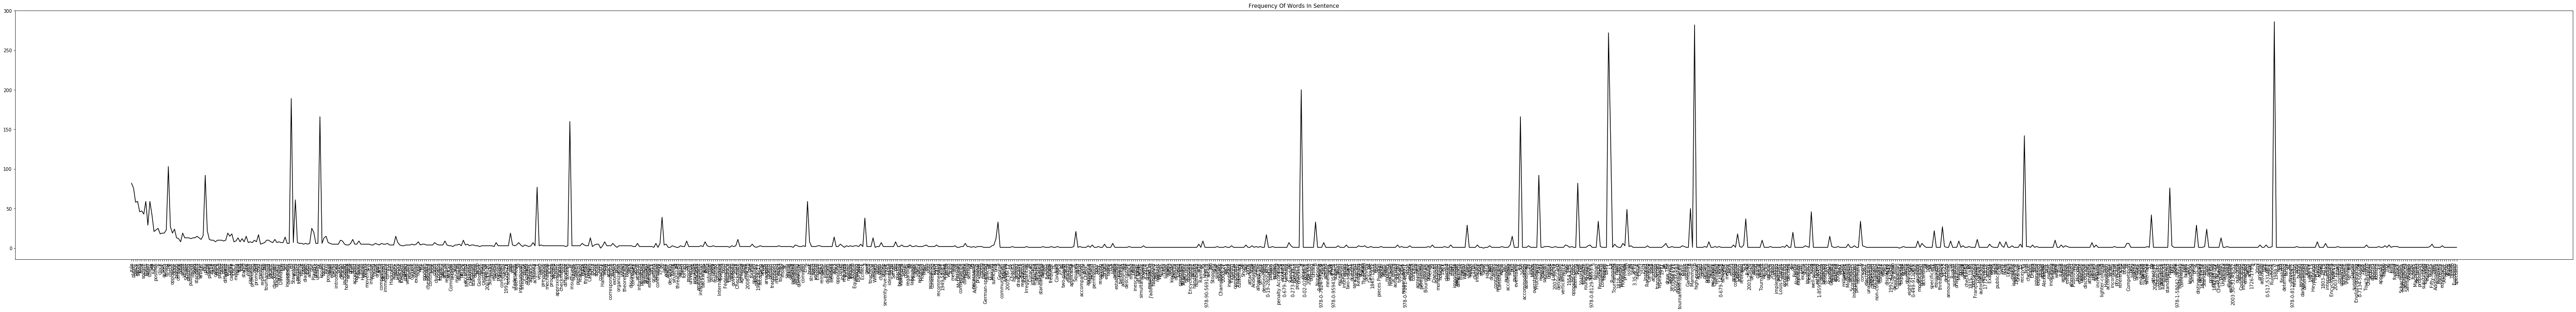

In [7]:
# __Token Frequency Within Sentences__
token_freq_df = count_token_frequency(chess, token_counts_df)

plot_title = 'frequency-of-words-in-sentence'
plt.figure(figsize=(100,10))
plt.title(plot_title.replace('-', ' ').title())
plt.plot(token_freq_df.transpose()[0], color='black', label='STANDARD')
plt.savefig(cd_figures+plot_title+'.png', transparent=True)
plt.xticks(rotation=90)


### Observation
The most frequent words are not necessarily the words that are repeated.
After checking the "Frequency Of Words In Sentence" chart, it's clear that
words are repeated across the distribution within the same sentence.
Rule is the said the most, but not the most repeated. Which makes sense due to
the nature of the document. 